[Practical Neuroimaging](https://practical-neuroimaging.github.io/on_convolution.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

보통 어떤 자극이 제공되면, neuronal firing이 일어나고 대략 4~5초 정도 일어난다. 이걸 단순히 Boxcar model로 일어난다고 가정

Text(0.5, 1.0, 'Neural model for 5 second event starting at time 4')

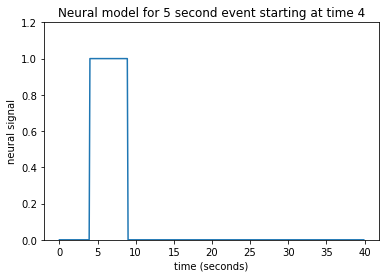

In [2]:
times = np.arange(0, 40, 0.1)
n_time_points = len(times)
neural_signal = np.zeros(n_time_points)
neural_signal[(times >= 4) & (times < 9)] = 1
plt.plot(times, neural_signal)
plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 1.2)
plt.title("Neural model for 5 second event starting at time 4")

그런데 좀 쉽게 쓰려고 일단 Impulse 형태라고 생각하자(firing 말고)

Text(0.5, 1.0, 'Neural model for very brief event at time 4')

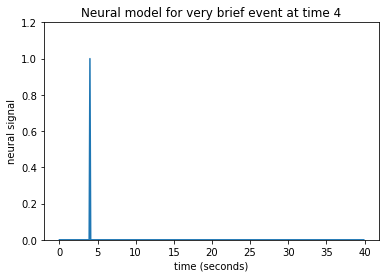

In [3]:
neural_signal = np.zeros(n_time_points)
i_time_4 = np.where(times == 4)[0]  # index of value 4 in "times"
neural_signal[i_time_4] = 1  # A single spike at time == 4
plt.plot(times, neural_signal)
plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 1.2)
plt.title("Neural model for very brief event at time 4")

그러면 neural signal이 혈류에 반응되는(BOLD)의 모델은, 이보다 약간 딜레이가 있고, 앞뒤로 undershoot이 일어난다. 요러한 반응을 Hemodynamic Response라고 일단 부르자...(또 이해가...)
+ Neuronal Activation: 실제로 어디가 활성화되었는가?
+ Hemodynamic Response: 위의 신경반응으로 보이는 혈류의 반응

-> 어떻게보면 HR이 조금 더 간접적인 Neuronal activation을 나타냄 음 오키

Onset=0으로 맞추어져있는 HRF를 가정

Text(0.5, 1.0, 'Estimated BOLD signal for event at time 0')

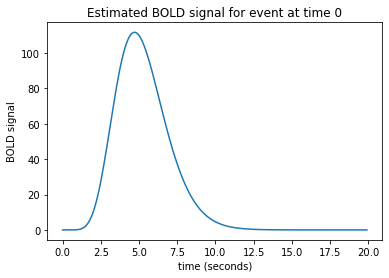

In [4]:
def hrf(t):
    "A hemodynamic response function"
    return t ** 8.6 * np.exp(-t / 0.547)

hrf_times = np.arange(0, 20, 0.1)
hrf_signal = hrf(hrf_times)
plt.plot(hrf_times, hrf_signal)
plt.xlabel('time (seconds)')
plt.ylabel('BOLD signal')
plt.title('Estimated BOLD signal for event at time 0')

아까 자극이 4초에 일어났으니까 4초만큼 밀어냄(ms단위라서 40 밀어냈음)

Text(0.5, 1.0, 'Output BOLD signal for event at time=4')

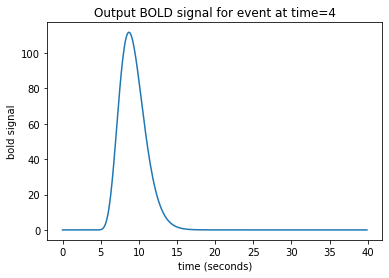

In [5]:
n_hrf_points = len(hrf_signal)
bold_signal = np.zeros(n_time_points)
bold_signal[i_time_4[0]:i_time_4[0] + n_hrf_points] = hrf_signal # onset걸어준듯
plt.plot(times, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Output BOLD signal for event at time=4')

아까 Neuronal Activation=1을 가정했는데, 2가되면?(we call it 'scaled')

Text(0.5, 1.0, 'Neural model for amplitude 2 impulse')

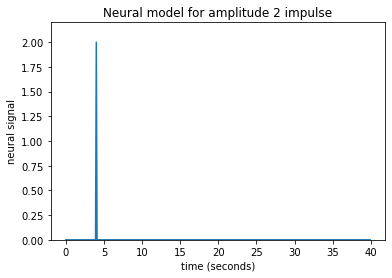

In [6]:
neural_signal[i_time_4] = 2  # An impulse with amplitude 2
plt.plot(times, neural_signal)
plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 2.2)
plt.title('Neural model for amplitude 2 impulse')

단순히 2배한게 된다. 그러니 어떻게보면 Neuronal activation -> HRF로 넘어가는 걸 선형적으로 해석할 수 있음

Text(0.5, 1.0, 'Output BOLD signal for amplitude 2 impulse')

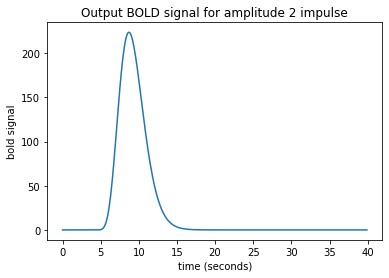

In [7]:
bold_signal = np.zeros(n_time_points)
bold_signal[i_time_4[0]:i_time_4[0] + n_hrf_points] = hrf_signal * 2
plt.plot(times, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Output BOLD signal for amplitude 2 impulse')

그리고 당연히 실험을 여러번 하니까 impulse도 여러번 나올거고, 그에 따른 반응의 세기도 다양할거임

Text(0.5, 1.0, 'Neural model for three impulses')

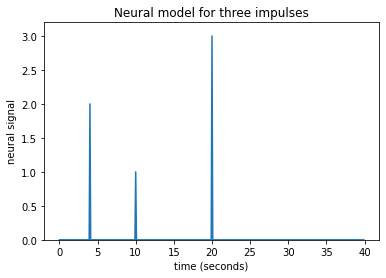

In [8]:
neural_signal[i_time_4] = 2  # An impulse with amplitude 2
i_time_10 = np.where(times == 10)[0]  # index of value 10 in "times"
neural_signal[i_time_10] = 1  # An impulse with amplitude 1
i_time_20 = np.where(times == 20)[0]  # index of value 20 in "times"
neural_signal[i_time_20] = 3  # An impulse with amplitude 3
plt.plot(times, neural_signal)
plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 3.2)
plt.title('Neural model for three impulses')

단순히 impulse별로 만들어낸 HRF를 가산하면됨

Text(0.5, 1.0, 'Output BOLD signal for three impulses')

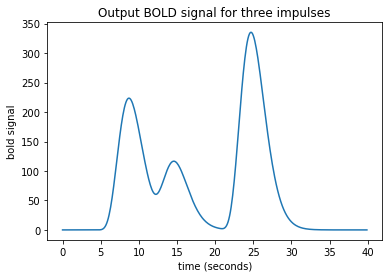

In [9]:
bold_signal = np.zeros(n_time_points)
bold_signal[i_time_4[0]:i_time_4[0] + n_hrf_points] = hrf_signal * 2
bold_signal[i_time_10[0]:i_time_10[0] + n_hrf_points] += hrf_signal * 1
bold_signal[i_time_20[0]:i_time_20[0] + n_hrf_points] += hrf_signal * 3
plt.plot(times, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Output BOLD signal for three impulses')

그런데 실제로는 이렇게 잠!깐! 머물러 가는게 아니라 Neuronal activity는 더 길게 움직일거니까 첫 번째 자극은 조금 두껍게(?) 줘보자

Text(0.5, 1.0, 'Neural model including event lasting 0.5 seconds')

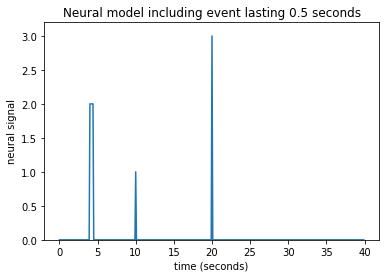

In [10]:
neural_signal[i_time_4[0]:i_time_4[0] + 5] = 2
plt.plot(times, neural_signal)
plt.xlabel('time (seconds)')
plt.ylabel('neural signal')
plt.ylim(0, 3.2)
plt.title('Neural model including event lasting 0.5 seconds')

아까랑 비교해보면 HRF가 좀 더 오래 작용하는 걸 볼 수 있음(shifted HRF를 4부터 4.4로 계속 걸어준다...?)

Text(0.5, 1.0, 'Output BOLD signal with event lasting 0.5 seconds')

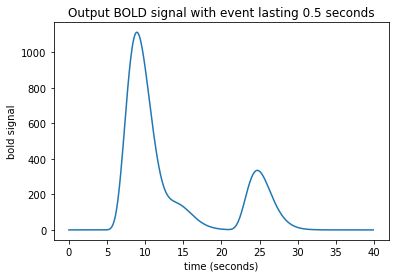

In [11]:
bold_signal = np.zeros(n_time_points)
for i in range(5):
    bold_signal[i_time_4[0] + i:i_time_4[0]  + i + n_hrf_points] += hrf_signal * 2
bold_signal[i_time_10[0]:i_time_10[0] + n_hrf_points] += hrf_signal * 1
bold_signal[i_time_20[0]:i_time_20[0] + n_hrf_points] += hrf_signal * 3
plt.plot(times, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Output BOLD signal with event lasting 0.5 seconds')

Text(0.5, 1.0, 'Output BOLD signal using our algorithm')

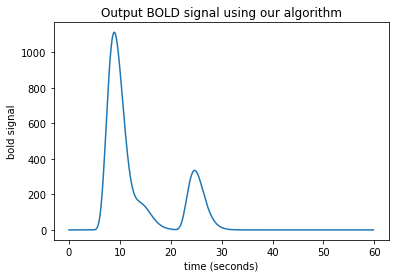

In [12]:
N = n_time_points
M = n_hrf_points
bold_signal = np.zeros(N + M - 1)  # adding the tail
for i in range(N):
    input_value = neural_signal[i]
    # Adding the shifted, scaled HRF
    bold_signal[i : i + n_hrf_points] += hrf_signal * input_value
# We have to extend 'times' to deal with more points in 'bold_signal'
extra_times = np.arange(n_hrf_points - 1) * 0.1 + 40
times_and_tail = np.concatenate((times, extra_times))
plt.plot(times_and_tail, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Output BOLD signal using our algorithm')

Text(0.5, 1.0, 'Our algorithm is the same as convolution')

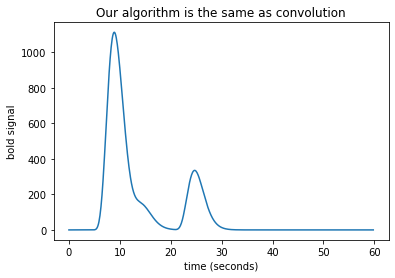

In [13]:
bold_signal = np.convolve(neural_signal, hrf_signal)
plt.plot(times_and_tail, bold_signal)
plt.xlabel('time (seconds)')
plt.ylabel('bold signal')
plt.title('Our algorithm is the same as convolution')

Text(0.5, 1.0, 'Predicted BOLD signal from convolution, 1 second resolution')

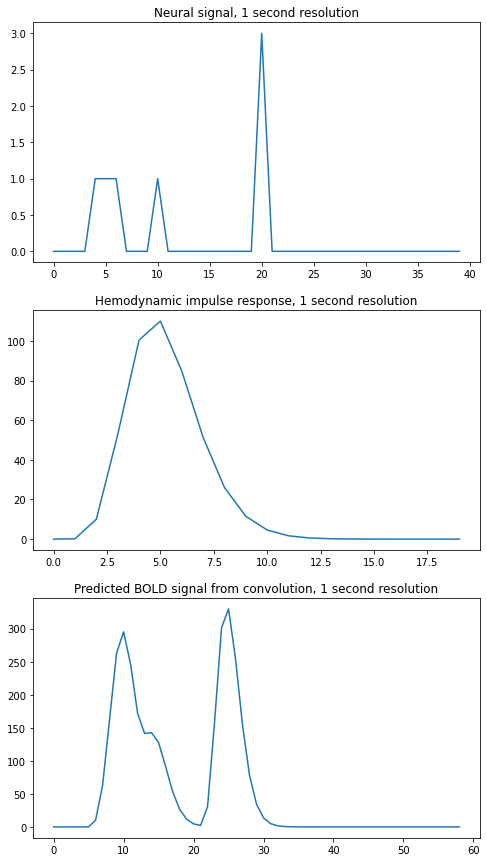

In [14]:
times = np.arange(0, 40)  # One time point per second
n_time_points = len(times)
neural_signal = np.zeros(n_time_points)
neural_signal[4:7] = 1  # A 3 second event
neural_signal[10] = 1
neural_signal[20] = 3
hrf_times = np.arange(20)
hrf_signal = hrf(hrf_times)  # The HRF at one second time resolution
n_hrf_points = len(hrf_signal)
bold_signal = np.convolve(neural_signal, hrf_signal)
times_and_tail = np.arange(n_time_points + n_hrf_points - 1)
fig, axes = plt.subplots(3, 1, figsize=(8, 15))
axes[0].plot(times, neural_signal)
axes[0].set_title('Neural signal, 1 second resolution')
axes[1].plot(hrf_times, hrf_signal)
axes[1].set_title('Hemodynamic impulse response, 1 second resolution')
axes[2].plot(times_and_tail, bold_signal)
axes[2].set_title('Predicted BOLD signal from convolution, 1 second resolution')

In [15]:
N = n_time_points
M = n_hrf_points
shifted_scaled_hrfs = np.zeros((N, N + M - 1))
for i in range(N):
    input_value = neural_signal[i]
    # Storing the shifted, scaled HRF
    shifted_scaled_hrfs[i, i : i + n_hrf_points] = hrf_signal * input_value
bold_signal_again = np.sum(shifted_scaled_hrfs, axis=0)

# We check that the result is almost exactly the same
# (allowing for tiny differences due to the order of +, * operations)
import numpy.testing as npt
npt.assert_almost_equal(bold_signal, bold_signal_again)

In [16]:
# First we make the shifted HRFs
shifted_hrfs = np.zeros((N, N + M - 1))
for i in range(N):
    # Storing the shifted HRF without scaling
    shifted_hrfs[i, i : i + n_hrf_points] = hrf_signal
# Then do the scaling
shifted_scaled_hrfs = np.zeros((N, N + M - 1))
for i in range(N):
    input_value = neural_signal[i]
    # Scaling the stored HRF by the input value
    shifted_scaled_hrfs[i, :] = shifted_hrfs[i, :] * input_value
# Then the sum
bold_signal_again = np.sum(shifted_scaled_hrfs, axis=0)
# This gives the same result, once again
npt.assert_almost_equal(bold_signal, bold_signal_again)

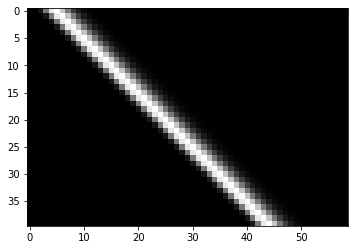

In [17]:
plt.imshow(shifted_hrfs, cmap='gray', interpolation='nearest')

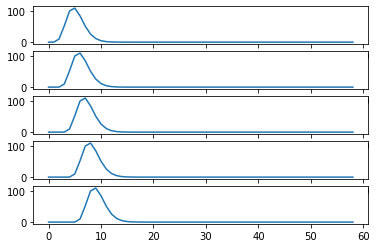

In [18]:
fig, axes = plt.subplots(5, 1)
for row_no in range(5):
    axes[row_no].plot(shifted_hrfs[row_no, :])